# TASK 2: Disease Prediction from Medical Data

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Dataset

In [3]:
df = pd.read_excel("heart_data.xlsx")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


## Basic Info and Null Check

In [4]:
# Dataset info
df.info()
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       25 non-null     int64
 1   sex       25 non-null     int64
 2   cp        25 non-null     int64
 3   trestbps  25 non-null     int64
 4   chol      25 non-null     int64
 5   fbs       25 non-null     int64
 6   restecg   25 non-null     int64
 7   thalach   25 non-null     int64
 8   exang     25 non-null     int64
 9   target    25 non-null     int64
dtypes: int64(10)
memory usage: 2.1 KB

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
target      0
dtype: int64


## Summary Statistics

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
count,25.000000,25.000000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,54.640000,0.720000,1.360000,134.92000,246.92000,0.200000,0.680000,158.480000,0.200000,0.680000
std,7.543651,0.458258,1.036018,15.02753,45.69183,0.408248,0.476095,16.386275,0.408248,0.476095
min,37.000000,0.000000,0.000000,110.00000,168.00000,0.000000,0.000000,108.000000,0.000000,0.000000
25%,50.000000,0.000000,1.000000,120.00000,207.00000,0.000000,0.000000,150.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,136.00000,254.00000,0.000000,1.000000,160.000000,0.000000,1.000000
75%,58.000000,1.000000,2.000000,140.00000,275.00000,0.000000,1.000000,172.000000,0.000000,1.000000
max,67.000000,1.000000,3.000000,172.00000,354.00000,1.000000,1.000000,187.000000,1.000000,1.000000


## Plotting target distribution (Pie Chart using Matplotlib)

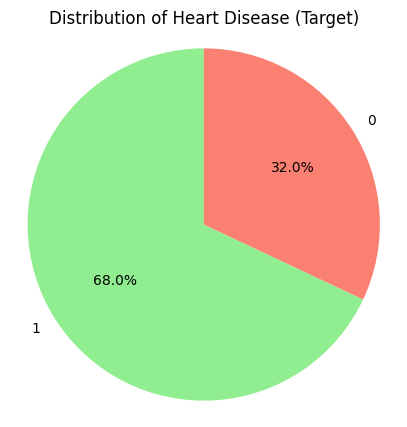

In [11]:
# Count of target values
target_counts = df['target'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Distribution of Heart Disease (Target)')
plt.axis('equal') 
plt.show()

## Correlation Matrix (Short Matplotlib Version)

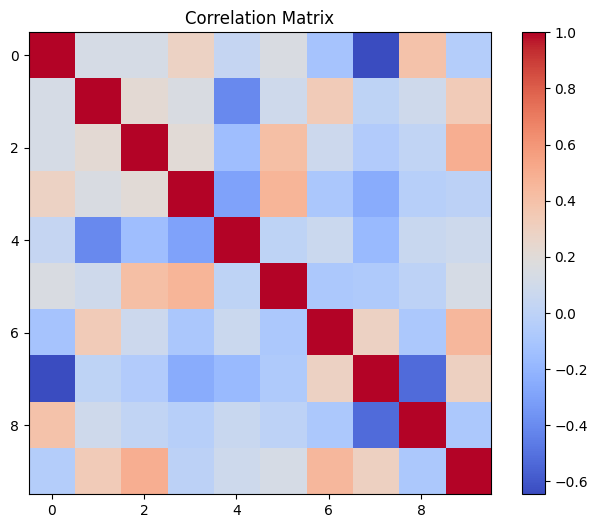

In [12]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()

## Splitting data

In [13]:
df = df.sample(frac=1).reset_index(drop=True)
# Convert features and labels
X = df.drop('target', axis=1).values
y = df['target'].values

# 80% training, 20% testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Simple Model using Logistic Regression (manual using NumPy logic)

In [14]:
y_pred = []
for row in X_test:
    chol = row[3] # cholesterol column
    thalach = row[7] # max heart rate column
    if chol < 240 and thalach > 140:
        y_pred.append(0)
    else:
        y_pred.append(1)
# Accuracy
correct = sum(y_pred[i] == y_test[i] for i in range(len(y_test)))
accuracy = correct / len(y_test) * 100
print(f"Accuracy (basic logic model): {accuracy:.2f}%")

Accuracy (basic logic model): 40.00%
